# The committee machine

### Requirements:
- Python3
- Scipy, numpy, matplotlib, skmonaco

To install and upgrade the packages: (pip3 install --upgrade numpy scipy matplotlib scikit-monaco)

# Import modules and Functions

In [3]:
%matplotlib inline

import sys
sys.path.append('Python/')

from main import *

# AMP and State Evolution

Let $K\geq 1 \in \mathbb{N}$ the number of hidden units, $X \in \mathbb{R}^{M \times N}$ the matrix containing $M$ samples of size $N$, $W \in \mathbb{R}^{N \times K}$ the matrix of weights and $Y \in \mathbb{R}^M$ the output of the network given by:

\begin{equation}
Y_\mu = {\rm{sign}}\Big[\sum_{l=1}^K {\rm{sign}} \Big( \sum_{i=1}^N X_{\mu i}  W_{i l} \Big) \Big]\, . \label{model:com}
\end{equation}

## Parameters

- $K=2$ : number of hidden units fixed in this demo
- N $\in$ [1000-10000] : size of each sample
- PW_choice = {binary,gaussian} : weights distribution
- alpha $\in [0.0-5.0]$ : $\alpha=\frac{M}{N}$
- verbose = {True,False} : to print intermediate results
- initialization_mode = {'load_backup','committee_symmetry',' '} : 'load_backup' to initialize close to the solution

In [4]:
N = 10000
PW_choice = 'binary'
alpha = 1.8
verbose = False
initialization_mode='load_backup'

## State Evolution

The state evolution of the AMP algorithm is its assymptotic and averaged behaviour in the limit $ N\to \infty$. The corresponding control parameters $q$ (overlap) and $R$ are given by the set of saddle point equations:
\begin{equation}
\label{main:StateEvolution}
q^{t+1} = 2 \frac{\partial \psi_{P0} }{\partial
          R}(R^t) \, , \hspace{1cm}
R^{t+1} = 2 \alpha \frac{\partial \Psi_{Pout
          } }{\partial q}(q^t;\rho)\, .
\end{equation}
(See the article for the expressions of $\Psi_{Pout}$ and $\psi_{P0}$). We implemented a solver of the previous iterative equations: 

##### Run SE 

In [5]:
obj_SE = run_SE(PW_choice=PW_choice,alpha=alpha,verbose=verbose,initialization_mode=initialization_mode)

Start initialization
Succeeded to load old objects :  Nearest alpha= 1.8
Successful initialization 

K= 2 PW= binary alpha= 1.8 channel= sign-sign
Start SE: Tue Jun 12 11:33:37 2018
Final overlap q_SE=
[0.45837986 0.24337973]
[0.24337973 0.45837986]
End SE


## Approximate Message Passing

We provide an implementation of the AMP algorithm trained on $M= \alpha N$ examples (See the article for the corresponding equations).

##### Run AMP

In [6]:
obj_AMP = run_AMP(PW_choice=PW_choice,N=N,alpha=alpha,verbose=verbose)

Start initialization
Successful initialization 

K= 2 PW= binary alpha= 1.8
Start AMP: Tue Jun 12 11:34:58 2018
Final overlap: q_AMP=
[0.46022775 0.25018657]
[0.25018657 0.46238632]
End AMP


## AMP vs SE

##### Plot the evolution of $q_{AMP}^t$ and $q_{SE}^t$

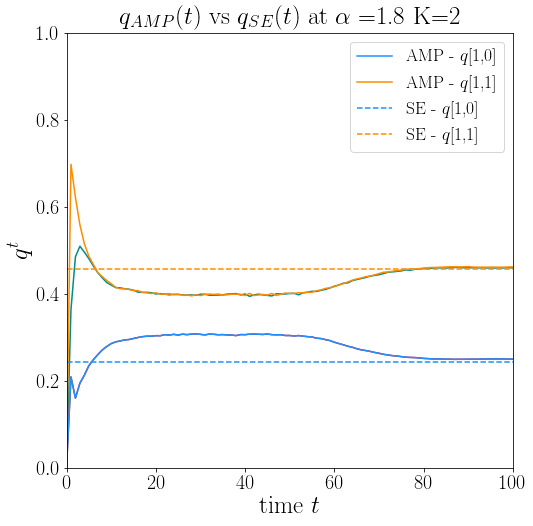

In [7]:
plot_q(obj_AMP,obj_SE)

The fixed point of the algorithm corresponds to the critical point of the state evolution free entropy and we thus compare in the figure above the elements of the overlap matrix $q^t$ coming from AMP and SE as a function of time $t$. (for the committee machine with two hidden units ($K=2$) at $\alpha$).

The full lines represent the AMP overlap matrix, for a single realization instance of size $N$. The dashed lines show the assymptotic and averaged behaviour of the algorithm in the limit N $\to \infty$. 

As illustrated, the overlap matrix of the AMP algorithm converges well towards its state evolution overlap. 

## Generalization error

We then compute the generalization error of the state evolution prediction and compare it to the algothimic error averaged over N_samples_gen_error$=10000$ samples:

\begin{align}
 \epsilon_g(\alpha) = \frac{1}{2} \mathbb{E} \left[\left(\mathbb{E}_{W|Y,X} \big[ \varphi_{\rm out}(X_{\rm new}  W)|Y,X\big] - \varphi_{\rm out}(X_{\rm new} W^*)\right)^2\right]
\end{align}

#### 1. Compute SE generalization error

In [8]:
gen_error_SE = run_gen_error_SE(obj_SE)

Generalization Error= 0.13473849999999998


#### 2. AMP generalization error (over N_samples_gen_error new samples)

In [9]:
## Compute the corresponding Generalization Error
N_samples_gen_error = 10000
tab_gen_AMP = run_gen_error_AMP(obj_AMP,PW_choice,N,alpha,N_samples_gen_error)

Start Gen Error
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
End Gen Error
Generalization Error = 0.1360656334235032


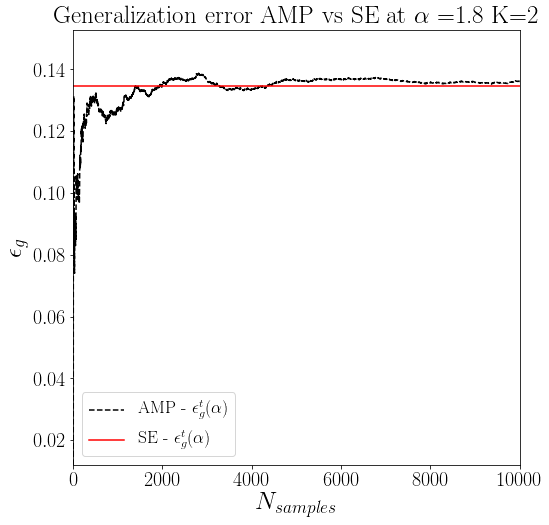

In [10]:
plot_gen_error(obj_AMP,tab_gen_AMP,gen_error_SE)